# 🔥Algerian Forest Fires Dataset Logistic Regression

## Data Source

* Data was taken from UCI Machine Learning Repository , link to same is given below.
* link: https://archive-beta.ics.uci.edu/ml/datasets/algerian+forest+fires+dataset

## Problem statement

**To perdict the Classes (fire or not fire) using Logistic regression and evaluating the models based on prefomance metrics.**

1. If the data is imbalanced, evaluate using precission and recall.
2. Convert the data into balanced data and get acurracy more than 90%.


### Essential initializations

#### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

#### Loading the data

In [2]:
data = pd.read_csv(r"Algerian_forest_fires_dataset_UPDATE.csv")
data.head()

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 247 entries, ('day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI') to ('30', '09', '2012', '24', '64', '15', '0.2', '67.3', '3.8', '16.5', '1.2', '4.8', '0.5')
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Bejaia Region Dataset   245 non-null    object
dtypes: object(1)
memory usage: 49.3+ KB


In [4]:
data.iloc[:122]

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,09,2012,26,81,21,5.8,48.6,3,7.7,0.4,3,0.1,not fire
26,09,2012,31,54,11,0,82,6,16.3,2.5,6.2,1.7,not fire
27,09,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire
28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire


In [5]:
data.iloc[122:]

,,,,,,,,,,,,,Bejaia Region Dataset
30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [6]:
df = pd.read_csv(r"Algerian_forest_fires_dataset_UPDATE.csv", header = 1)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [7]:
#  0 for Bejaia Region
df.loc[:122, 'Region'] = 0
df[120:124]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0.0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0.0
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,NaN


In [8]:
#  1 for Sidi-Bel Abbes Region
df.loc[122:, 'Region'] = 1
df[115:130]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
115,24,09,2012,29,65,19,0.6,68.3,5.5,15.2,1.5,5.8,0.7,not fire,0.0
116,25,09,2012,26,81,21,5.8,48.6,3,7.7,0.4,3,0.1,not fire,0.0
117,26,09,2012,31,54,11,0,82,6,16.3,2.5,6.2,1.7,not fire,0.0
118,27,09,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire,0.0
119,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,0.0
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0.0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0.0
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0


In [9]:
df.drop([122, 123], axis = 0, inplace = True)
df[115:130]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
115,24,09,2012,29,65,19,0.6,68.3,5.5,15.2,1.5,5.8,0.7,not fire,0.0
116,25,09,2012,26,81,21,5.8,48.6,3,7.7,0.4,3,0.1,not fire,0.0
117,26,09,2012,31,54,11,0,82,6,16.3,2.5,6.2,1.7,not fire,0.0
118,27,09,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire,0.0
119,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,0.0
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0.0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0.0
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1.0
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1.0


### Understanding data

* The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia and the Sidi Bel-abbes.
* 122 instances for each region.
* 2 dimensional dataframe

### Attribute Information:

* Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)

**Weather data observations**</br>
* Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42</br>
* RH : Relative Humidity in %: 21 to 90</br>
* Ws :Wind speed in km/h: 6 to 29</br>
* Rain: total day in mm: 0 to 16.8</br>

**FWI Components**</br>
* Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5</br>
* Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9</br>
* Drought Code (DC) index from the FWI system: 7 to 220.4</br>
* Initial Spread Index (ISI) index from the FWI system: 0 to 18.5</br>
* Buildup Index (BUI) index from the FWI system: 1.1 to 68</br>
* Fire Weather Index (FWI) Index: 0 to 31.1</br>
* Classes: two classes, namely fire and not fire</br>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 30.5+ KB


In [11]:
#  Removing unwanted spaces from the column names

df.columns= [col_name.strip() for col_name in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [12]:
for c in ['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']:
    df[c]= df[c].str.replace(" ","")
df.value_counts()

day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC   DC     ISI   BUI   FWI   Classes  Region
01   06     2012  29           57  18  0     65.7  3.4   7.6    1.3   3.4   0.5   notfire  0.0       1
23   09     2012  35           56  14  0     89    29.4  115.6  7.5   36    15.2  fire     1.0       1
20   07     2012  36           50  16  0     89.9  32.7  71     9.5   32.6  17.3  fire     1.0       1
     08     2012  35           68  19  0     88.3  25.9  130.6  8.8   34.7  16.8  fire     0.0       1
                  36           81  15  0     83.7  34.4  107    3.8   38.1  9     fire     1.0       1
                                                                                                    ..
11   08     2012  40           31  15  0     94.2  22.5  46.3   16.6  22.4  21.6  fire     1.0       1
     09     2012  30           73  14  0     79.2  6.5   16.6   2.1   6.6   1.2   notfire  1.0       1
                               77  21  1.8   58.5  1.9   8.4    1.1   2.4   0.

In [13]:
#  Some string in numeric column

df[df['FWI'] == 'fire']

#  seems the values have shifted

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,fire,NaN,1.0


In [14]:
#  correcting the data

df.loc[167,'FWI'] = '0.0'
df.loc[167, 'Classes'] = 'fire'

df[160:170]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
162,09,07,2012,36,43,15,1.9,82.3,9.4,9.9,3.2,9,3.1,fire,1.0
163,10,07,2012,34,51,16,3.8,77.5,8,9.5,2,7.7,1.3,notfire,1.0
164,11,07,2012,34,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,notfire,1.0
165,12,07,2012,36,44,13,0,90.1,12.6,19.4,8.3,12.5,9.6,fire,1.0
166,13,07,2012,39,45,13,0.6,85.2,11.3,10.4,4.2,10.9,4.7,fire,1.0
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.69,12.5,10.4,0.0,fire,1.0
168,15,07,2012,34,45,17,0,90.5,18,24.1,10.9,17.7,14.1,fire,1.0
169,16,07,2012,31,83,17,0,84.5,19.4,33.1,4.7,19.2,7.3,fire,1.0
170,17,07,2012,32,81,17,0,84.6,21.1,42.3,4.7,20.9,7.7,fire,1.0
171,18,07,2012,33,68,15,0,86.1,23.9,51.6,5.2,23.9,9.1,fire,1.0


In [15]:
# Columns to be converted to numeric

to_num_col = ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

for t in to_num_col:
    df[t] = pd.to_numeric(df[t])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(8), int64(6), object(1)
memory usage: 38.6+ KB


In [16]:
#  1 for fire and 2 for no fire

df.replace({"notfire": 0, "fire": 1}, inplace = True)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1.0
242,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1.0
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1.0
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    int64  
 14  Region       244 non-null    float64
dtypes: float64(8), int64(7)
memory usage: 38.6 KB


In [18]:
# checking missing values

df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [19]:
#  Saving into csv for further use.

df.to_csv('Algerian_forest_fires_dataset_PD_Dataframe.csv', index = True)

## EDA

**A detailed analysis was done [here](https://github.com/Shaah-i/EDA/blob/main/Algerian%20Forest%20Fires%20EDA/Algerian%20Forest%20Fires%20Dataset%20EDA.ipynb), we will now see relevant visualization.**

### Univariate Analysis

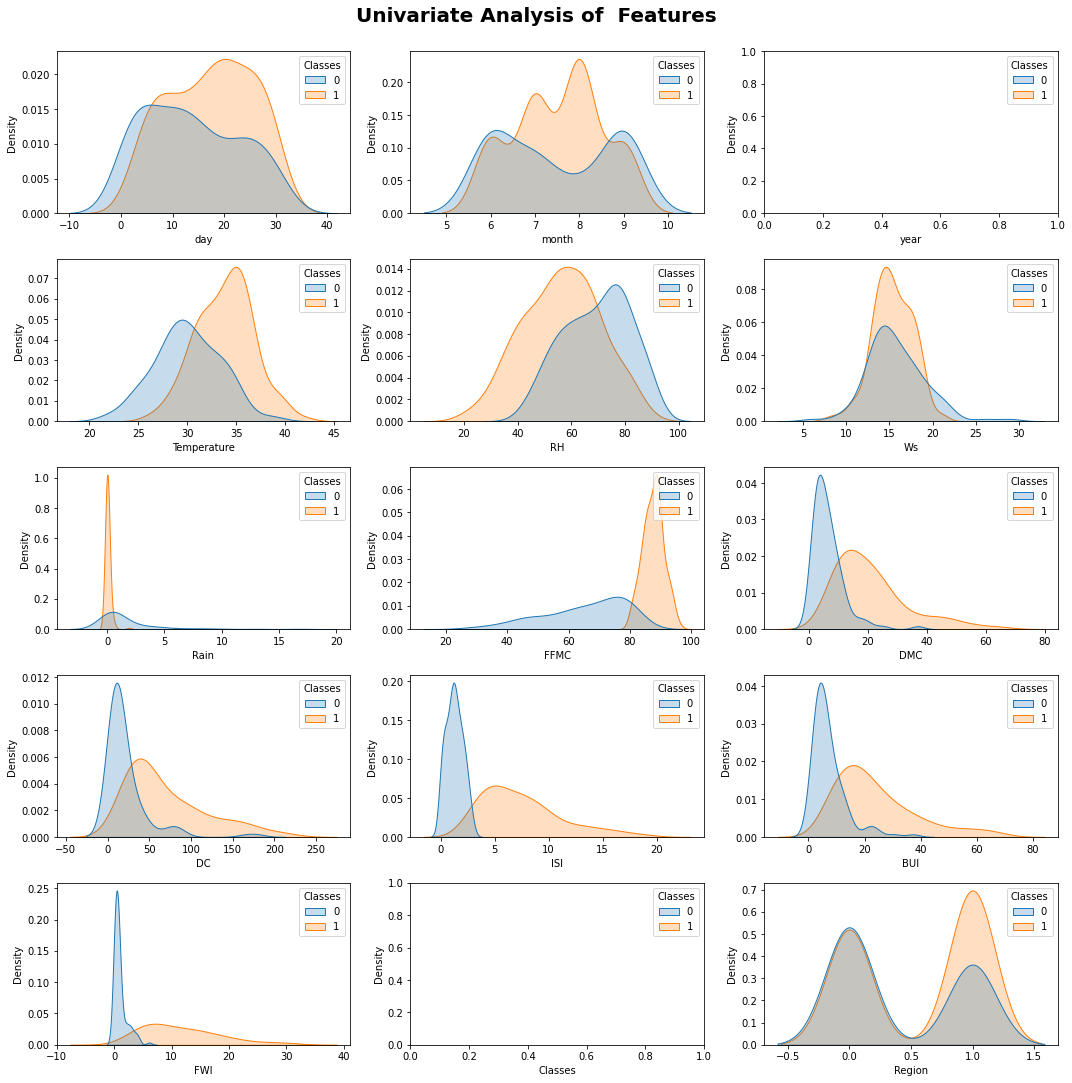

In [20]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of  Features', fontsize=20, fontweight='bold', y =1)

for i,j in enumerate(df.columns):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[j], shade=True, color='y', hue= df['Classes'])
    plt.xlabel(j)
    plt.tight_layout()

**Observations**

* Temperature, RH and Ws follow normal distribution
* Rain, DMC, DC, ISI, BUI and FWI  are right skewed.
* FFMC is left skewed.
* As we know data is biased as target has few instances more than the other [ Classes : notfire(0) -106 and fire(1) - 138 ]

* Most fires are caught in month of August, and in 3rd and 4th week of the months.
* Most fires are caught when temperature is around 32, RH is around 58, FFMC is around 90, DMC is around 15, DC is around 35, 
* If ISI is more than 4 then there is high possiblity of fire
* If FWI is more than 8 then there is high possiblity of fire.

Precised thresholds can be found by ploting each feature against the target.

### Multivariate Analysis

**Getting the correlation**

In [21]:
#  Not taking date features into consideration.

correlation = round(df[[col for col in df.columns if col not in ['day', 'month', 'year']]].corr(),2)

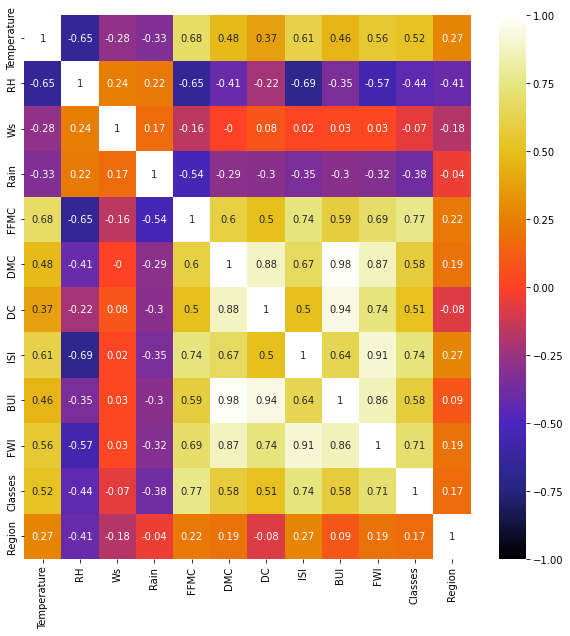

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cmap="CMRmap", annot = True, vmin=-1, vmax=1)
plt.show()

**Observations**
* BUI-DMC, BUI-DC, FWI-ISI are very highly corelated
* ISI-FFMC, DC-DMC, FWI-DMC, FWI-DC,FWI-BWI  are highly corelated

* Correlation with target
    - FFMC, ISI and FWI are highly corelated with the Classes.
    - Temperature, DMC, DC, BUI are moderately corelated.
    - Ws is least corelated followed by Region.

**Relationship between feature and target**

In [23]:
features = [feature for feature in df.columns if feature not in ['day', 'month', 'year', 'Region', 'Classes']]
features

['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

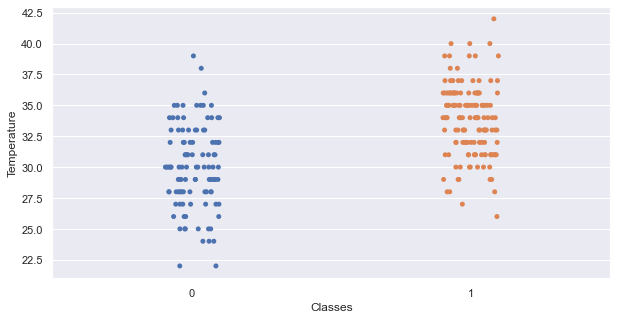

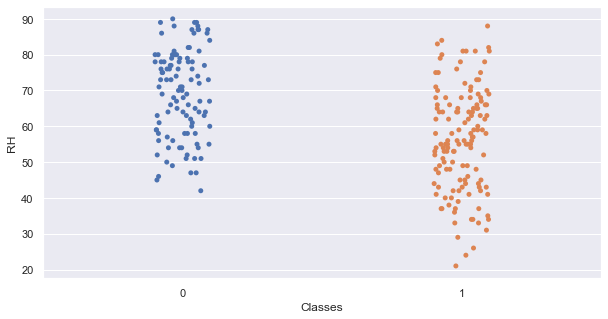

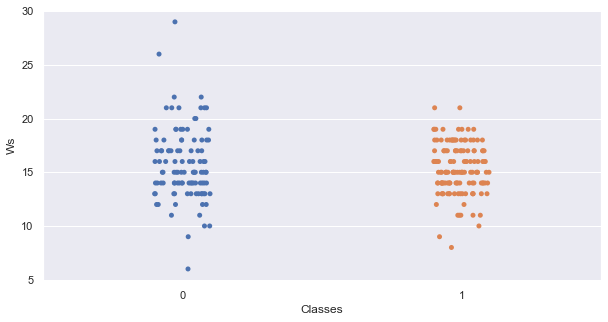

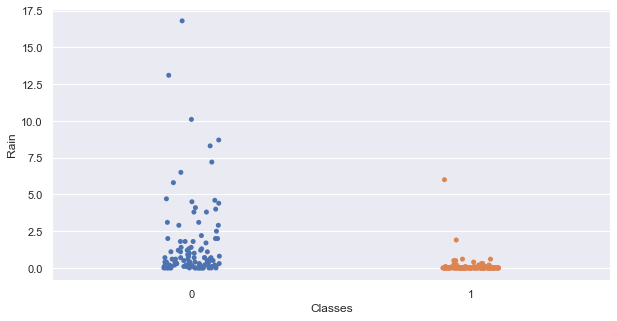

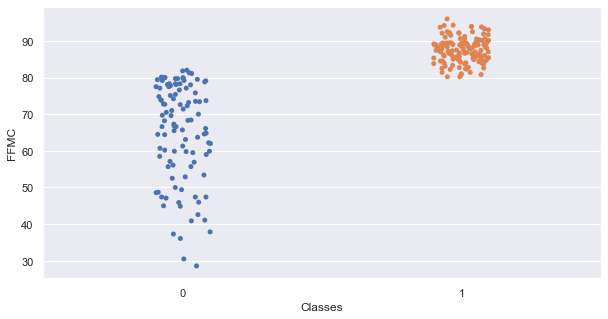

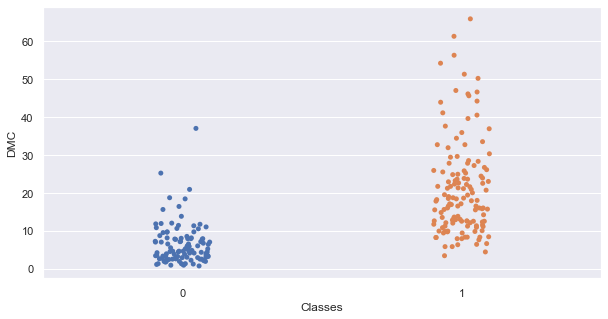

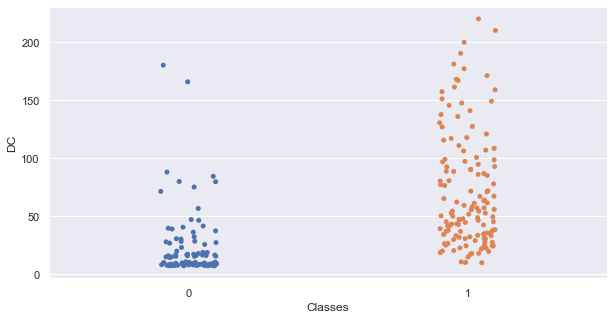

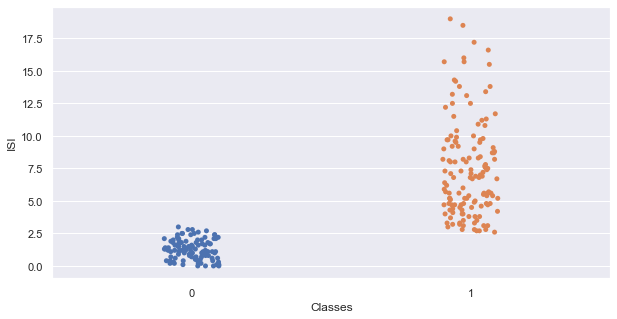

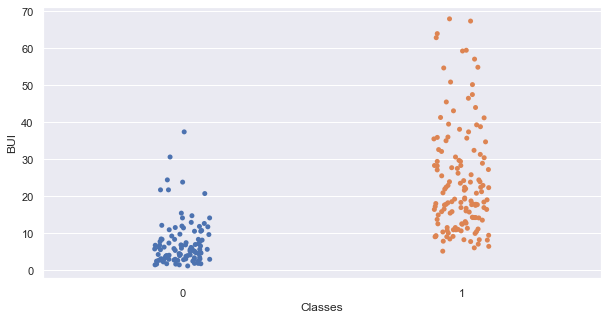

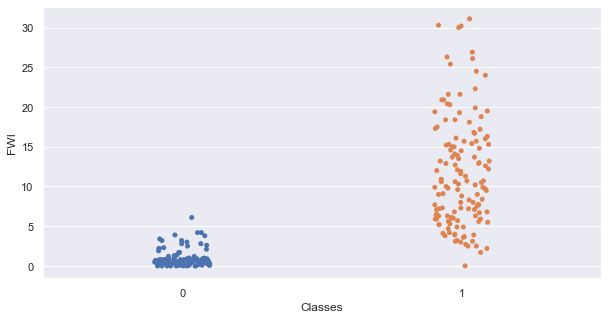

In [24]:
sns.set(rc={'figure.figsize':(10,5)})
for f in features:
    sns.stripplot(data=df, y=f, x='Classes')
    plt.show();

**Observations**

* Temperature less than 35 have hardly caught fires.
* Lower relative humidity results in fires.
* If FFMC is greater than 80 there is definitely a fire.
* DMC above 20 is a cause for fire.
* If ISI is greater than 2.5 definitely there will be fire.
* FWI above 5 can be considered as fire.

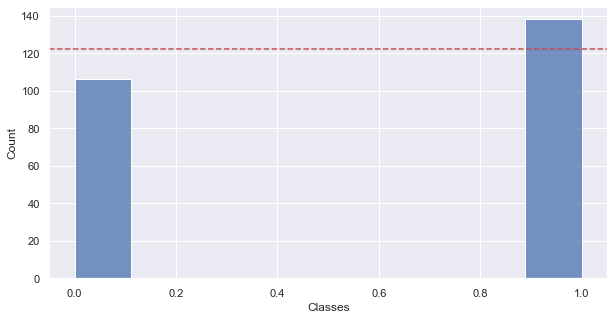

In [25]:
# Checking if the dataset is balanced or not

exp_dis = df["Classes"].shape[0]/2

sns.histplot(df['Classes'])
plt.axhline(exp_dis, color="r", linestyle="--")

In [26]:
df.Classes.value_counts()

1    138
0    106
Name: Classes, dtype: int64

<AxesSubplot:>

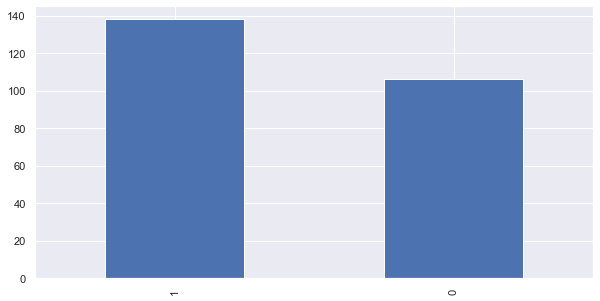

In [27]:
df['Classes'].value_counts().plot(kind = 'bar')

**The dataset is balanced, no need of handling imbalance.**

**Creating X and y for our model**

In [28]:
X = df.drop('Classes', axis = 1)
X

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0
242,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1.0
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1.0
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1.0


In [29]:
y = df['Classes']
y

0      0
1      0
2      0
3      0
4      0
      ..
241    1
242    0
243    0
244    0
245    0
Name: Classes, Length: 244, dtype: int64

**Splitting into test and train data**

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=32)

In [32]:
X_train

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
22,23,6,2012,32,62,18,0.1,81.4,8.2,47.7,3.3,11.5,3.8,0.0
91,31,8,2012,28,80,21,16.8,52.5,8.7,8.7,0.6,8.3,0.3,0.0
216,1,9,2012,29,86,16,0.0,37.9,0.9,8.2,0.1,1.4,0.0,1.0
190,6,8,2012,30,54,14,3.1,70.5,11.0,9.1,1.3,10.5,0.8,1.0
117,26,9,2012,31,54,11,0.0,82.0,6.0,16.3,2.5,6.2,1.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,1.0
54,25,7,2012,31,65,18,0.0,84.3,12.5,88.7,4.8,18.5,7.3,0.0
135,12,6,2012,27,58,17,0.0,88.9,21.3,37.8,8.7,21.2,12.9,1.0
43,14,7,2012,34,61,13,0.6,73.9,7.8,22.9,1.4,8.4,0.8,0.0


In [33]:
X_test

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
33,4,7,2012,33,78,17,0.0,80.1,4.6,18.5,2.7,5.7,1.7,0.0
114,23,9,2012,32,54,11,0.5,73.7,7.9,30.4,1.2,9.6,0.7,0.0
208,24,8,2012,35,38,15,0.0,92.1,51.3,147.7,12.2,54.9,26.9,1.0
151,28,6,2012,37,37,13,0.0,92.5,27.2,52.4,11.7,27.1,18.4,1.0
20,21,6,2012,30,78,14,0.0,81.0,6.3,31.6,2.6,8.4,2.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,11,8,2012,40,31,15,0.0,94.2,22.5,46.3,16.6,22.4,21.6,1.0
240,25,9,2012,28,70,15,0.0,79.9,13.8,36.1,2.4,14.1,3.0,1.0
203,19,8,2012,35,66,15,0.1,82.7,32.7,96.8,3.3,35.5,7.7,1.0
96,5,9,2012,29,75,16,0.0,80.8,3.4,24.0,2.8,5.1,1.7,0.0


In [34]:
y_train

22     1
91     0
216    0
190    0
117    0
      ..
126    0
54     1
135    1
43     0
217    0
Name: Classes, Length: 170, dtype: int64

In [35]:
y_test

33     0
114    0
208    1
151    1
20     1
      ..
195    1
240    0
203    1
96     1
121    0
Name: Classes, Length: 74, dtype: int64

In [36]:
## Standardize the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [37]:
X_train = scaler.fit_transform(X_train)

In [38]:
X_test = scaler.transform(X_test)

## Model Training

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
log_reg = LogisticRegression()

In [41]:
log_reg.fit(X_train, y_train)

LogisticRegression()

**Model Performance**

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [43]:
y_pred = log_reg.predict(X_test)

In [44]:
print("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  0.9594594594594594


In [45]:
# confusion matrix

cm = confusion_matrix(y_test, y_pred)

print("confusion_matrix : ", cm)

confusion_matrix :  [[34  1]
 [ 2 37]]


In [46]:
tp = cm[0][0]
print("True Positive = ", tp)
fp = cm[0][1]
print("False Positive = ", fp)
fn = cm[1][0]
print("False Negative = ", fn)
tn = cm[1][1]
print("True Negative = ", tn)

True Positive =  34
False Positive =  1
False Negative =  2
True Negative =  37


In [47]:
# Precision

precision = tp/(tp+fp)
print("Precision =",precision)

Precision = 0.9714285714285714


In [48]:
#  Recall

recall = tp/(tp+fn)
print("Recall =", recall)

Recall = 0.9444444444444444


In [49]:
# f Beta score
# here false negative (no fire given when there was fire) is of major concern hence we will use Beta = 2

f2_score = 5*precision*recall/((4*precision)+recall)
print("f2 score =", f2_score)

f2 score = 0.9497206703910615


**Classification Report**

In [50]:
print("Classification Report : \n\n", classification_report(y_test, y_pred))

Classification Report : 

               precision    recall  f1-score   support

           0       0.94      0.97      0.96        35
           1       0.97      0.95      0.96        39

    accuracy                           0.96        74
   macro avg       0.96      0.96      0.96        74
weighted avg       0.96      0.96      0.96        74

